# Trabajo Semanal 4 bis
### Renata Salvati Dávila
***

<img src="./Especificaciones.png" align="center" /> 

**1. Obtener la transferencia normalizada del filtro.**
<img src="./Hoja1.jpeg" align="center" /> 
<img src="./Hoja2.jpeg" align="center" /> 

In [1]:
# Inicialización e importación de módulos

# Módulos externos
import numpy as np
import scipy.signal as sig
import matplotlib as mpl
import math

from matplotlib import pyplot as plt
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, bodePlot, pzmap, tf2sos_analog, pretty_print_SOS

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

In [2]:
#Datos de enunciado para filtro pasa altos
a_max = 3
a_min = 20

k_db = 10

fp1 = 1600*(10**3)
fp2 = 2500*(10**3)
fs1 = 1250*(10**3)
fs2 = 3200*(10**3) 

w0 = 2*np.pi*np.sqrt(fp1*fp2)

nf = w0 #norma de frecuencia

#normalización de frecuencias angulares
w0_n = w0/nf
wp1_n = (2*np.pi*fp1)/nf
wp2_n = (2*np.pi*fp2)/nf
ws1_n = (2*np.pi*fs1)/nf
ws2_n = (2*np.pi*fs2)/nf

Bw = wp2_n - wp1_n #ancho de banda
Q = w0_n/Bw #factor de selectividad

#conversión de parámetros para un filtro pasa bajos equivalente
Wp1_n = round(Q*(wp1_n**2 - w0_n**2)/wp1_n, 3)
Wp2_n = round(Q*(wp2_n**2 - w0_n**2)/wp2_n, 3)
Ws1_n = round(Q*(ws1_n**2 - w0_n**2)/ws1_n, 3)
Ws2_n = round(Q*(ws2_n**2 - w0_n**2)/ws2_n, 3)

Wp_n = math.fabs(Wp1_n)

#verifico para Ws1 y Ws2 cuál es la más chica en módulo y elijo esa para trabajar con el prototipo
if math.fabs(Ws1_n) < math.fabs(Ws2_n):
    Ws_n = math.fabs(Ws1_n)
else:
    Ws_n = math.fabs(Ws2_n)     

print(f"Frecuencias angulares normalizadas del pasa-bajos prototipo: \nwp = {Wp_n}, ws = {Ws_n}\n")    
    
#Obtención de epsilon y n
e2 = round(10**(a_max/10) - 1, 1)

for aux_n in range(2,5):
    aux_a_min = 10*np.log10(1 + e2*Ws_n**(2*aux_n))
    
    if aux_a_min > a_min:
        n = aux_n
        break
        
print(f"Parámetros del filtro pasa-bajos prototipo: \ne² = {e2}, n = {n}")

Frecuencias angulares normalizadas del pasa-bajos prototipo: 
wp = 1.0, ws = 2.167

Parámetros del filtro pasa-bajos prototipo: 
e² = 1.0, n = 3


In [3]:
#transferencias de cada etapa del pasa-bajos prototipo 
num1_lp_n = num2_lp_n = [1.]
den1_lp_n = [1., 1.]
den2_lp_n = [1., 1., 1.]

#numeradores y denominadores resultantes de la transformación de cada etapa del pasa-bajos
num1_bp_n, den1_bp_n = sig.lp2bp(num1_lp_n, den1_lp_n, w0_n, Bw)
num2_bp_n, den2_bp_n = sig.lp2bp(num2_lp_n, den2_lp_n, w0_n, Bw)

sos1_bp = tf2sos_analog(num1_bp_n, den1_bp_n)
sos2_bp = tf2sos_analog(num1_bp_n, den2_bp_n)

num_bp_n = np.polymul(num1_bp_n, num2_bp_n)
den_bp_n = np.polymul(den1_bp_n, den2_bp_n)

sos_bp = tf2sos_analog(num_bp_n, den_bp_n)

print("Primera etapa del pasa-bajos al pasa-banda")
pretty_print_lti(num1_bp_n, den1_bp_n)
pretty_print_SOS(sos1_bp, mode='omegayq') #factorizando

print("\nSegunda etapa del pasa-bajos al pasa-banda")
pretty_print_lti(num2_bp_n, den2_bp_n)
pretty_print_SOS(sos2_bp, mode='omegayq') #factorizando

print("\nArmando la transferencia completa")
pretty_print_lti(num_bp_n, den_bp_n)
pretty_print_SOS(sos_bp, mode='omegayq') #factorizando

Primera etapa del pasa-bajos al pasa-banda


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Segunda etapa del pasa-bajos al pasa-banda


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Armando la transferencia completa


<IPython.core.display.Math object>

<IPython.core.display.Math object>

**2. Graficar el diagrama de polos y ceros.**
<img src="./Hoja3.jpeg" align="center" /> 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

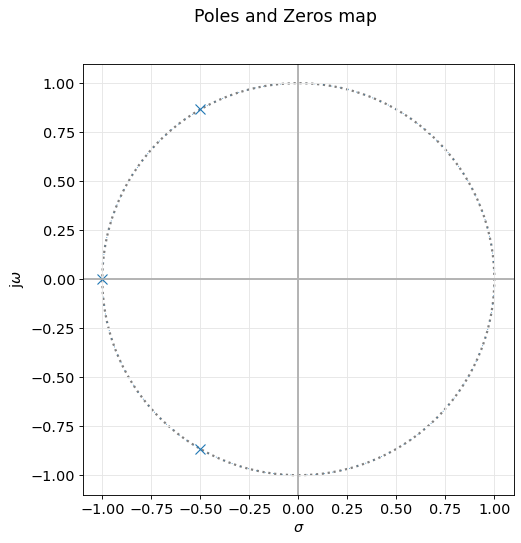

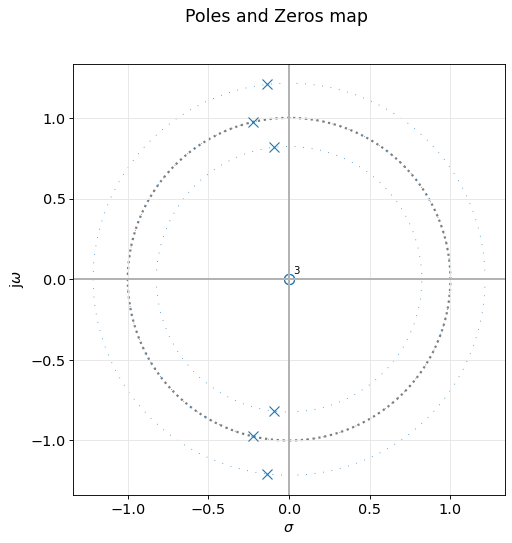

In [4]:
num_lp_n = [1.]
den_lp_n = [1., 2., 2., 1.]

#calculo la ganancia en veces
k = round(10**(k_db/20), 3)

sos_bp = tf2sos_analog(num_bp_n*k, den_bp_n)
pretty_print_lti(num_bp_n, den_bp_n)
pretty_print_SOS(sos_bp, mode='omegayq') #factorizando

#transferencias completas del pasa-bajos y pasa-banda
H_lp_n = sig.TransferFunction(num_lp_n, den_lp_n)
H_bp_n = sig.TransferFunction(num_bp_n*k, den_bp_n)

pzmap(H_lp_n);
pzmap(H_bp_n);

**3. Graficar la transferencia (módulo y fase) del filtro pedido.**
<img src="./Hoja4.jpeg" align="center" />

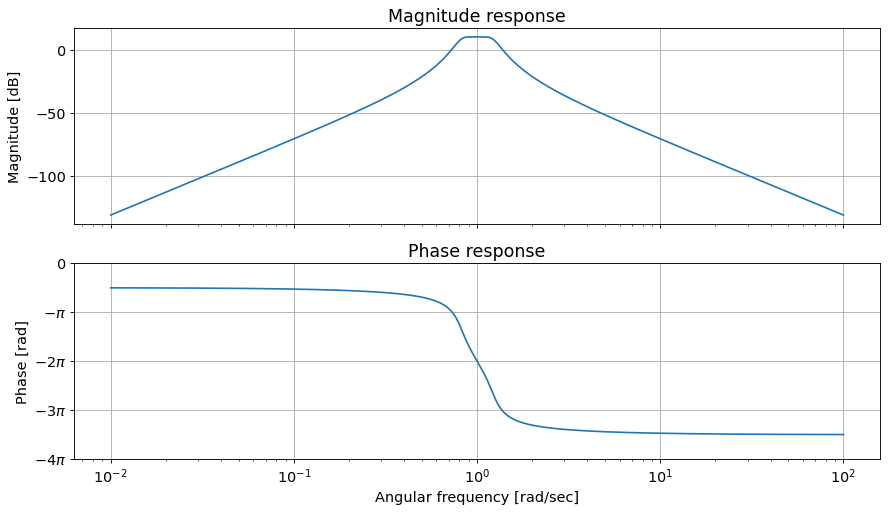

In [5]:
bodePlot(H_bp_n);

**4. Sintetizar el filtro utilizando estructuras Ackerberg-Mossberg**
<img src="./Hoja5.jpeg" align="center" />
<img src="./Hoja6.jpeg" align="center" />

En un principio se hizo una sintetización pasiva para hacer un paso previo y ver que diera buenos resultados.
<img src="./Circuito1.png" align="center" />
<img src="./Simulación1.png" align="center" />
<img src="./Simulación2.png" align="center" />

Como se cumplió con la plantilla se pasó a la sintetización activa.
<img src="./Circuito2.png" align="center" />
<img src="./Simulación3.png" align="center" />
<img src="./Simulación4.png" align="center" />

## Observaciones

Se puede ver que en la implementación activa la banda de paso tiene una atenuación un poco menos a la pedida. Cuando se realizó esta sintetización aparecieron algunos errores en la simulación, siendo que el problema era el ancho de banda que tenían los OPAMPs; se solucionó ampliando el mismo hasta obtener valores esperados.

Siguiendo el análisis de la transformación de un pasa-bajos en un pasa-banda de primer y segundo orden se puede observar que se respetan los valores esperados de q y w para cada uno. Para el segundo orden (del pasa-bajos) el q va a ser el mismo (en el pasa-banda) y que las w son una la inversa de la otra, respetando que (w1.w2)=1.